In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [53]:
import kagglehub

path = kagglehub.dataset_download("ayushsarraf0731/tata-global")
print("Path to dataset: ", path)

Path to dataset:  /root/.cache/kagglehub/datasets/ayushsarraf0731/tata-global/versions/1


In [54]:
data = pd.read_csv("/root/.cache/kagglehub/datasets/ayushsarraf0731/tata-global/versions/1/NSE-Tata-Global-Beverages-Limited.csv")
data.head(10)

Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   
5  2018-09-28  234.05  235.95  230.20  233.50  233.75             3069914.0   
6  2018-09-27  234.55  236.80  231.10  233.80  233.25             5082859.0   
7  2018-09-26  240.00  240.00  232.50  235.00  234.25             2240909.0   
8  2018-09-25  233.30  236.75  232.00  236.25  236.10             2349368.0   
9  2018-09-24  233.55  239.20  230.75  234.00  233.30             3423509.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  
5          7162.35  
6         11859.95  
7          5248.60  
8          5503.90  
9          7999.55

**Downloaded the dataset directly form kaggle**

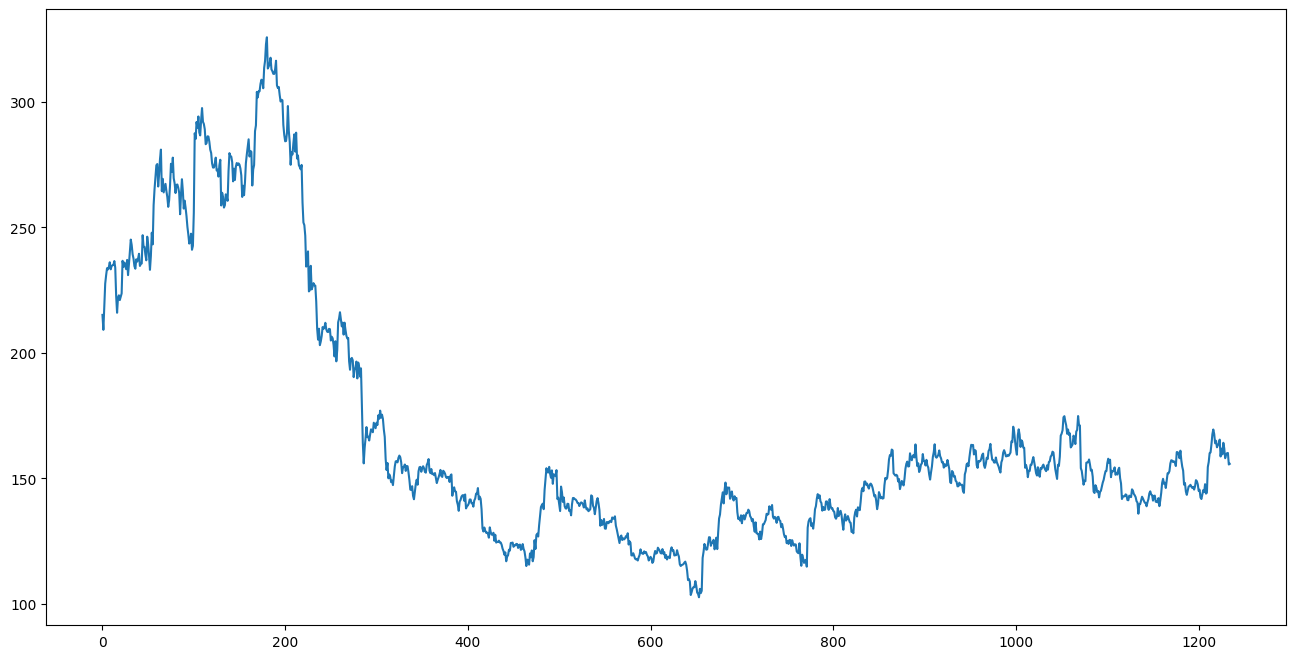

In [43]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')

# CLASSIFICATION PROBLEM: whether to Buy(+1) or Sell(-1) the stocks

In [69]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

**Input features to predict whether the customer should buy or sell the stocks**

In [70]:
X = data[['Open - Close', 'High - Low']]
X.head()

Open - Close  High - Low
0         -7.15       15.40
1          7.80       12.70
2          5.30       11.65
3          2.40       11.75
4          3.65       13.55

In [71]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)
Y

array([-1,  1,  1, ..., -1,  1, -1])

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

**Implementation of KNN Classifier**

In [76]:
#using grid search to find best parameters
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn  = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(x_train, y_train)

#Accuracy score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train_data accuracy: ', accuracy_train)
print('Test_data accuracy: ', accuracy_test)

Train_data accuracy:  0.8833693304535637
Test_data accuracy:  0.8673139158576052


In [78]:
predictions_classification = model.predict(x_test)
actual_predicted_value = pd.DataFrame({'Actual Class': y_test, 'Predicted Class':predictions_classification})
actual_predicted_value.head(10)

Actual Class  Predicted Class
0            -1               -1
1            -1               -1
2            -1               -1
3             1                1
4             1                1
5            -1               -1
6             1                1
7            -1               -1
8             1                1
9            -1                1

# Regression problem by KNN

In [81]:
# the value of x will remian the same but for y we will use "Close"

Y = data['Close']
Y

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

In [85]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X, Y, test_size=0.25, random_state=44)

In [86]:
#using grid search to find best parameters
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg  = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# fit the model and make prediction
model_reg.fit(x_train_reg, y_train_reg)
predictions = model_reg.predict(x_test_reg)

print(predictions)

[194.13333333 195.22666667 241.17333333 160.50333333 132.12666667
 225.41333333 198.15333333 174.71333333 130.63       137.87333333
 190.37333333 136.34666667 153.69       137.92333333 238.05666667
 149.19333333 168.46333333 143.99333333 180.39       142.59333333
 169.21666667 167.02333333 184.94666667 149.61666667 150.27
 137.31333333 157.04       141.01666667 212.63666667 240.75
 139.23       151.44       155.12       155.51333333 142.98333333
 245.51333333 171.78       143.48666667 133.82333333 143.84
 146.15333333 138.24333333 154.83       189.26666667 141.07666667
 152.07666667 140.00333333 131.75       176.82666667 226.25666667
 154.15666667 214.65       136.79333333 187.22       141.21666667
 142.47       133.54333333 141.02333333 163.46666667 223.89
 156.58       144.06333333 139.39       140.         185.09666667
 207.2        153.53666667 194.35       137.12333333 147.11
 168.96666667 142.79666667 171.51666667 155.54333333 153.09
 152.66       192.56333333 190.78666667 170.45

In [87]:
#Root Mean Squared Error
rms = np.sqrt(np.mean(np.power((np.array(y_test_reg)-np.array(predictions)),2)))
rms

38.41423312544876

In [90]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close': predictions})
valid.head(10)

Actual Close  Predicted Close
1000        161.60       194.133333
715         132.50       195.226667
283         193.85       241.173333
410         143.90       160.503333
1188        145.15       132.126667
141         278.20       225.413333
230         226.35       198.153333
794         139.50       174.713333
481         139.40       130.630000
707         137.55       137.873333